# Cost Function and Gradient Descent

### Consider the following notations:

- $m$ = no. of training examples
- $n$ = no. of features corresponding to each training example
- $x^i$ = input(feature) of the $i^{th}$ training example
- $x^i_j$ = value of the feature $j$ in the $i^{th}$ training example

We will stick to this notation (and others as we discuss further in this notebook) throughout all our future discussion

Now, for understanding cost function and its role, consider a linear regression model with an input vector $x^i = (X_1 , X_2)$, and a real-valued output $y$. The linear regression model has the form:

$$f_\theta(X) = \theta_0 + \theta_1X_1 + \theta_2X_2$$

Here:
- $[\theta_1, \theta_2]$ are called **model weights** (generally) OR **coefficients** (in linear regression)
- $\theta_0$ is called **bias** (generally) OR **intercept** (in linear regression)

We consider a set of training data $(x_1 , y_1 ) \dots (x_m , y_m )$ from which to estimate the parameters $\theta$. Here m is the no of training examples we have. 

The Linear model can be plotted as:

<center><img src="../images/lr.png" width="400"/></center>

## Cost function

A cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X (independent variables) and y (dependent variable).

The function that defines the difference between your actual value ($y_t$) and the predicted value ($y_p$). 

$$
y_t = y_p + e
$$

In case of Linear regression with $y_p = f_\theta(X) = \theta_0 + \theta_1X_1 + \theta_2X_2$

The error can be represented as:

$$
error = y_t - y_p = y_t - (\theta_0 + \theta_1X_1 + \theta_2X_2)
$$

Graphically the errors can be represented as: 

<center><img src="../images/error.png" width="400"/></center>

We have different kinds of error like- total error, mean error, mean squared error etc.

Total error: Summation of the absolute difference between predicted and actual value for all the data points. Mathematically, this is

<img src="../images/total_err.png">

Mean error: Total error / number of data points. Mathematically, this is

<img src="../images/mean_err.png">

Mean squared error: Summation of the square of absolute difference / number of data points. Mathematically, this is

<img src="../images/mean_sq_err.png">

#### The cost function is a function of the errors , and in turn the function of the parameters. The same can be represenred as:

cost function = $ J_\theta = f(\theta_i) $

### Some types of Cost function

#### residual sum of squares:
$$J_\theta = \sum_{i=1}^me_i^2 = \sum_{i=1}^m(y_t - \theta_0 - \theta_1X_1 - \theta_2X_2)^2$$

#### Mean Square Errors:
$$J_\theta =  \frac{1}{m}\sum_{i=1}^me_i^2 = \frac{1}{2m}\sum_{i=1}^m(y_t - \theta_0 - \theta_1X_1 - \theta_2X_2)^2$$

The goal of any model training in machine learning is to **minimise the associated cost function**: $ minimise \ J_\theta $

# Gradient descent

##### Before jumping into "Gradient Descent", first lets understand what is "Gradient" : 

 - A gradient is an extension of partial derivatives. Gradients take the partial derivatives of each variable in a function and then places each partial derivative in a vector. The gradient value is zero at a local maximum or local minimum (because there is no single direction of increase) -  also referred to as **convergence**.
 
 
 - In mathematics, the **gradient is a multi-variable generalization of the derivative**. While a derivative can be defined on functions of a single variable, for functions of several variables, the gradient takes its place. The gradient is a vector-valued function, as opposed to a derivative, which is scalar-valued.
 
 
 - **Gradient** of a function (at any given point) gives the direction of the **steepest ascent**, i.e. the direction to move if you want to increase the function. 

##### Gradient Descent is an **optimisation algorithm** that attempts to find the **local or global minima** of a **convex** function by using its **partial derivatives**. In ML it is used to __optimise the cost function__ (reduce our total error). 

A convex function in its simplest form have the useful property that local minima is the global minima.
<center><img src="../images/convexity.png" width="500"/></center>

The idea behind "Gradient Descent" is very simple — to reach the global optimum of a convex function from any point, we need to move in the direction **opposite** to that of greatest increase of the function. As the function is convex, this strategy will always take us to the global optimum. 

<center><img src="../images/gd1.png" width="400"/></center>

Let us now understand this in terms of the cost function $J_\theta$

Now, we know that the _direction_ of **greatest increase of any function** is determined by taking the partial derivatives of the function with respect to every variable (aka the gradient). For example, let us say we wish to optimise a convex function $J(\theta)$, where $\theta = (\theta_1, \theta_2, \ldots, \theta_n)^T$. Let us say, we start at a point $s \in \mathbb{R}^d$. Then, the direction of greatest increase of $J$ at $s$ is given by 

$$
\nabla J(s) = \left(\frac{\partial J(s)}{\partial \theta_1}, \frac{\partial J(s)}{\partial \theta_2}, \ldots ,\frac{\partial J(s)}{\partial \theta_n} \right)^T.
$$

Since we want to **decrease the function**, we take the **negative gradient**. The length of the gradient function is an indication of how step the slope is. 
 
With this derivative, we design an update rule, which asks us to move in the direction opposite to the direction of greatest increase. By repeatedly applying this rule, we hope to reach the global minimum. We hence move to $t$, which is given by

$$
t = s - \gamma \nabla J(s),
$$
where $\gamma$ is a parameter called the *learning rate*.

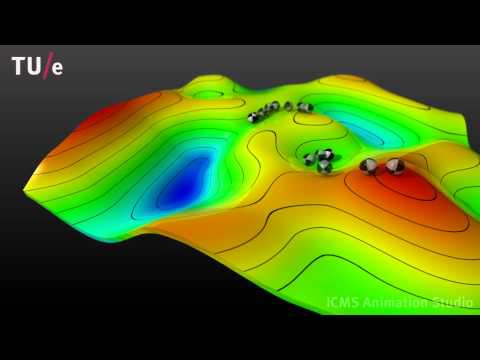

In [33]:
from IPython.display import YouTubeVideo

#https://www.youtube.com/watch?v=vWFjqgb-ylQ
YouTubeVideo("vWFjqgb-ylQ", width=1000, height=500)

#### Gradient with level curves
![Gradient descent on a 2D convex function](../images/gd.png)

## Practical Example

Consider a Liner regression problem, to find the equation of the straight line $f_\theta(x) = \theta_0 + \theta_1X_1 + \theta_2X_2$ that best fits our data points. 

First lets create dummy data around this model:
- m = 50
- n = 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
feature_1=np.random.randint(low=1,high=20,size=(50,))
feature_2=np.random.randint(low=1,high=20,size=(50,)) 

feature_1.shape, feature_2.shape

((50,), (50,))

In [13]:
x1 = np.array(feature_1).reshape(50,1)
x0 = np.ones_like(feature_1).reshape(50,1)
x2 = np.array(feature_2).reshape(50,1)

x = np.hstack((x0,x1,x2))
x[:3,:]

array([[ 1, 13, 15],
       [ 1, 14,  9],
       [ 1, 15, 15]])

In [14]:
y_true=3+2*x[:,1]-4*x[:,2]+np.random.random((50,))
print(y_true.shape)
y_true[:3]

(50,)


array([-30.56676509,  -4.59856751, -26.17680948])

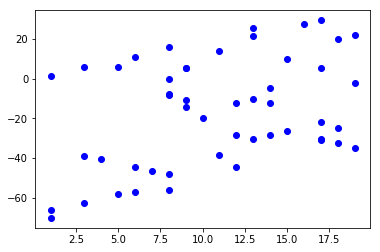

In [15]:
plt.scatter(x[:,1], y_true, marker='o', c='b')
plt.show()

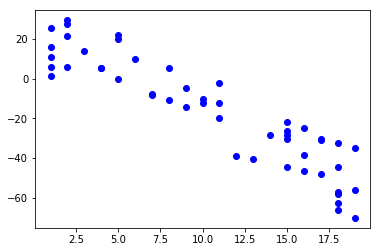

In [16]:
plt.scatter(x[:,2], y_true, marker='o', c='b')
plt.show()

In [17]:
m = len(x)
m

50

The function that we are trying to minimize in this case is:

$J(\theta_0,\theta_1, \theta_2) = {1 \over 2m} \sum\limits_{i=1}^m (f_\theta(x^i)-y^i)^2$

In this case, our gradient will be defined in three dimensions as:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1, \theta_2) = \frac{1}{m}  \sum\limits_{i=1}^m (f_\theta(x^i)-y^i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1, \theta_2) = \frac{1}{m}  \sum\limits_{i=1}^m ((f_\theta(x^i)-y^i) \cdot x^i_1)$

$\frac{\partial}{\partial \theta_2} J(\theta_0,\theta_1, \theta_2) = \frac{1}{m}  \sum\limits_{i=1}^m ((f_\theta(x^i)-y^i) \cdot x^i_2)$


The weight matrix will be updated following the equation:

$w_{t+1} = w_t - \gamma \nabla J(s)$

Below, we set up our function for f, J and the gradient:

In [18]:
f = lambda theta_0,theta_1, theta_2, x: theta_0 + theta_1*x[1] + theta_2*x[2]

In [19]:
def J(x,y,m,theta_0,theta_1, theta_2):
    
    returnValue = 0
    
    for i in range(m):        
        returnValue += (f(theta_0,theta_1, theta_2, x[i])-y[i])**2
        
    returnValue = returnValue/(2*m)
    
    return returnValue

In [20]:
def grad_J(x,y,m,theta_0,theta_1, theta_2):
    
    returnValue = np.array([0.,0.,0.]) #initalise all the parameter values
    
    for i in range(m):
        returnValue[0] += (f(theta_0,theta_1, theta_2, x[i])-y[i])
        returnValue[1] += (f(theta_0,theta_1, theta_2, x[i])-y[i])*x[:,1][i]
        returnValue[2] += (f(theta_0,theta_1, theta_2, x[i])-y[i])*x[:,2][i]
        
    returnValue = returnValue/(m)
    
    return returnValue

And we run our gradient descent algorithm (without adaptive step sizes in this example):

In [24]:
w=np.zeros(x.shape[1]) #weight matrix
n_k = 0.001 # learning rate
#s_k = float("inf")
s_k = np.array([float("inf"),float("inf"),float("inf")])

num_steps = 20000
for i in range(num_steps):
    s_k = -grad_J(x,y_true,m,w[0],w[1], w[2])

    if i%500==0:
        cost = J(x,y_true,m,w[0],w[1], w[2])
        print("steps:{}, cost:{}, neg_gradient:{} weights:{} {} {}".format(i, round(cost,3), s_k, round(w[0],3),
                                                                           round(w[1],3), round(w[2],3)))
        
    w = w + n_k * s_k

print("\nLocal minimum occurs where:")
print("theta_0 =", w[0])
print("theta_1 =", w[1])
print("theta_2 =", w[2])
print("This took",num_steps,"steps to converge")

steps:0, cost:503.004, neg_gradient:[ -16.8055078  -126.86575963 -329.80597402] weights:0.0 0.0 0.0
steps:500, cost:0.772, neg_gradient:[ 0.42967699 -0.02074545 -0.01451574] weights:0.196 2.162 -3.887
steps:1000, cost:0.685, neg_gradient:[ 0.40354682 -0.01948894 -0.01362799] weights:0.404 2.152 -3.894
steps:1500, cost:0.608, neg_gradient:[ 0.3790058  -0.01830375 -0.01279923] weights:0.599 2.142 -3.9
steps:2000, cost:0.54, neg_gradient:[ 0.35595719 -0.01719064 -0.01202087] weights:0.783 2.133 -3.907
steps:2500, cost:0.481, neg_gradient:[ 0.33431025 -0.01614522 -0.01128984] weights:0.956 2.125 -3.913
steps:3000, cost:0.428, neg_gradient:[ 0.31397973 -0.01516337 -0.01060327] weights:1.118 2.117 -3.918
steps:3500, cost:0.381, neg_gradient:[ 0.29488558 -0.01424124 -0.00995845] weights:1.27 2.11 -3.923
steps:4000, cost:0.34, neg_gradient:[ 0.2769526  -0.01337518 -0.00935284] weights:1.413 2.103 -3.928
steps:4500, cost:0.304, neg_gradient:[ 0.26011019 -0.01256179 -0.00878406] weights:1.547 2.

For comparison, let's see the actual values for $\theta_0$, $\theta_1$ and $\theta_2$:

In [25]:
print("Actual values for theta are:")
print("theta_0 =", 3)
print("theta_1 =", 2)
print("theta_2 =", -4)

Actual values for theta are:
theta_0 = 3
theta_1 = 2
theta_2 = -4


So we see that our values are relatively close to the actual values (even though our method was pretty slow).

Notice that in the method above we need to calculate the gradient over all the m training samples, in every step of our algorithm. With the dummy dataset, this is not a big deal since there are only 50 data points. But imagine that we had 10 million data points. If this were the case, it would certainly make the method above far less efficient.

In machine learning, the algorithm above is often called <b>batch gradient descent</b> (each step of gradient descent uses all the training examples) to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

### Stochastic gradient descent

As we said above, in batch gradient descent, we must look at every example in the entire training set on every step. This can be quite slow if the training set is sufficiently large. In <b>stochastic gradient descent</b>, we update our values after looking at <i>each</i> item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the three theta values as follows:


$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1, \theta_2) = \frac{1}{m}  \sum\limits_{i=1}^m (f_\theta(x^i)-y^i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1, \theta_2) = \frac{1}{m}  \sum\limits_{i=1}^m ((f_\theta(x^i)-y^i) \cdot x^i_1)$

$\frac{\partial}{\partial \theta_2} J(\theta_0,\theta_1, \theta_2) = \frac{1}{m}  \sum\limits_{i=1}^m ((f_\theta(x^i)-y^i) \cdot x^i_2)$

Where $f_\theta(x) = \theta_0 + \theta_1X_1 + \theta_2X_2$

Then we followed this algorithm (where $\alpha$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $w_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla J(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $w_{k+1} = w_k + \alpha s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had 50 data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_{1} \\ 
 \theta_2 \\ 
 \theta_3 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \theta_1 \\ 
 \theta_2 \\
 \theta_3 \\ 
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(f_\theta(x^i)-y^i) \\ 
 2x^i_j(f_\theta(x^i)-y^i) \\ 
 2x^i_j(f_\theta(x^i)-y^i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

The update rule for weights goes as:
$w_{t+1} = w_{t} - \eta (y_{i} - \hat{y}) x_{i}$

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for k in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

With batch gradient descent, we must go through the entire data set before we make any progress. With this algorithm though, we can make progress right away and continue to make progress as we go through the data set. Therefore, stochastic gradient descent is often preferred when dealing with large data sets.

Unlike gradient descent, stochastic gradient descent will tend to oscillate <i>near</i> a minimum value rather than continuously getting closer. It may never actually converge to the minimum though. One way around this is to slowly decrease the step size $\alpha$ as the algorithm runs. However, this is less common than using a fixed $\alpha$.

Let's look at above example again, but this time with stochastic gradient descent for linear regression.

In [26]:
feature_1=np.random.randint(low=1,high=20,size=(50,))
feature_2=np.random.randint(low=1,high=20,size=(50,)) 

x1 = np.array(feature_1).reshape(50,1)
x0 = np.ones_like(feature_1).reshape(50,1)
x2 = np.array(feature_2).reshape(50,1)

x = np.hstack((x0,x1,x2))

y =3+2*x[:,1]-4*x[:,2]+np.random.random((50,))

m = len(y)

Now we'll setup our h function and our cost function, which we will use to check how the value is improving.

In [18]:
f = lambda theta_0,theta_1, theta_2, x: theta_0 + theta_1*x[1] + theta_2*x[2]
cost = lambda theta_0,theta_1, theta_2, x_i, y_i: 0.5*(f(theta_0,theta_1,theta_2,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. We will run through the entire list 1000 times here:

In [32]:
w=np.zeros(x.shape[1]) #weight matrix
n_k = 0.001 # step size

s_k = np.array([float("inf"),float("inf"),float("inf")])

num_steps=400
for j in range(num_steps):
    for i in range(m):
        s_k[0] = (f(w[0],w[1],w[2],x[i])-y[i])
        s_k[1] = (f(w[0],w[1],w[2],x[i])-y[i])*x[:,1][i]
        s_k[2] = (f(w[0],w[1],w[2],x[i])-y[i])*x[:,2][i]
        
        s_k = (-1)*s_k
        
        w = w + n_k * s_k  
            
print("\nLocal minimum occurs where:")
print("theta_0 =", w[0])
print("theta_1 =", w[1])
print("theta_2 =", w[2])


Local minimum occurs where:
theta_0 = 3.2446002498628124
theta_1 = 2.01100600474393
theta_2 = -3.985609947676734


As you can see, our values for $\theta_0$, $\theta_1$ and $\theta_2$ are close to their true values.

## Mini-Batch Gradient Descent (MB-GD)

Mini-Batch Gradient Descent (MB-GD) a compromise between batch GD and SGD. In MB-GD, we update the model based on smaller groups of training samples; instead of computing the gradient from 1 sample (SGD) or all n training samples (GD), we compute the gradient from 1<k<n training samples (a common mini-batch size is k=50).

MB-GD converges in fewer iterations than GD because we update the weights more frequently; however, MB-GD let's us utilize vectorized operation, which typically results in a computational performance gain over SGD.

## Other Optimisation Strategies (other than Gradient Descent)

### Brent's method for optimisation. 

Brent's method does not require the function to optimize to be convex or derivable everywhere, and works as a combination of the secant method and parabola fittings, as follows:
1. Take a, b such that f'(a) < 0 and f'(b) > 0
2. Repeat:
  * Compute c = (a+b)/2
  * Compute the point d where the parabola that goes through a, b and c is minimal
  * If f'(d) < 10^{-sthg}: stop
  * Otherwise if f'(d) < 0: replace a with d, otherwise: replace b with d.

<img src="../images/brent.png" width="600"/>

Illustration's source: Press, W. H., et al. (1992) "Numerical Recipes in Fortran, The Art of Scientific Computing", Cambridge University Press, Chapter 10.

To illustrate the above, we begin by defining a function to optimise:
$$J(x) = (x - 1)^4 + x^2$$

In [23]:
from scipy.optimize import minimize_scalar

# specify objective/cost function
J = lambda x : (x - 1) ** 4 + x ** 2

res = minimize_scalar(J, method='brent')
print('xmin: %.02f, fval: %.02f, iter: %d' % (res.x, res.fun, res.nit))

xmin: 0.41, fval: 0.29, iter: 12


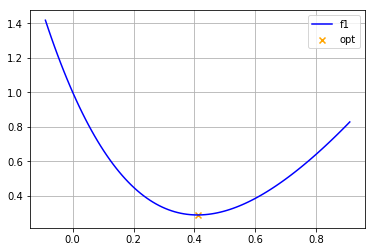

In [25]:
# plot curve
x = np.linspace(res.x - 0.5, res.x + 0.5, 100)
y = [J(val) for val in x]
plt.plot(x, y, color='blue', label='f1')

# plot optima
plt.scatter(res.x, res.fun, color='orange', marker='x', label='opt')

plt.grid()
plt.legend(loc=1)

### First and second-order characterizations

A twice-differentiable convex function has a positive semi-definite Hessian $\mathbf{x} \mapsto \nabla^2 f(\mathbf{x})$ and is minimized where the gradient $\mathbf{x} \mapsto \nabla f(\mathbf{x})$ is equal to 0.

### Newton's Method

Newton's method is a second order method, minimising a quadratic Taylor approximation to the objective function at each point. It thus combines the gradient and Hessian matrix,

$$\mathbf{x}_{k+1} = \mathbf{x}_{k} -\alpha\mathbf{H}_k^{-1}\mathbf{g}_k$$

where $\mathbf{g}_k = \nabla f(\mathbf{x_k})$ and $\mathbf{H}_k = \nabla^2 f(\mathbf{x_k})$. This is a multi-dimensional generalisation of the Newton root-finding method (here we are finding the root of the gradient). Newton's method typically involves a line search to optimise the size of the descent step, $\alpha$.

Newton's method uses a line search to optimise each descent step by choosing a step size $\alpha$ that optimises the descent direction, that is, $$\min_\alpha f(\mathbf{x_k} + \alpha \mathbf{d}_k),$$ where $\mathbf{d}_k = \nabla f({\mathbf{x}_k})$ is the descent direction.

### Conjugate gradient method

The [conjugate gradient method](https://en.wikipedia.org/wiki/Conjugate_gradient_method) is an alternative to gradient descent. For a linear system $\mathbf{A}\mathbf{x} = \mathbf{b}$, this algorithm finds a solution as a linear combination of a set of *mutually conjugate vectors*, $\mathbf{p}_d$, such that,

$$\mathbf{x}^* = \sum_{d=1}^D \alpha_d\mathbf{p}_d$$ for the $D$ dimensions of the problem. The vectors are built determined one by one in a process similar to the [Gram Schmidt process](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). Particularly for a sparse system, a good approximate solution can be determined without constructing the entire conjugate set.